# Objective: Compute TFID of imported .txt documents

### Importing packages

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import docx2txt

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'C:\\Users\\dulur\\Desktop\\Projects\\TFID Similarities'

### Importing my Grimm stories

In [3]:
Cinderella = docx2txt.process("Cinderella.docx")
Briar_Rose = docx2txt.process("Briar-Rose.docx")
Hansel_and_Gretel = docx2txt.process("Hansel and Gretel.docx")
Little_Red_Cap = docx2txt.process("Little Red-Cap.docx")
Little_Snow_White = docx2txt.process("Little Snow-White.docx")
Rapunzel = docx2txt.process("Rapunzel.docx")
The_Adventures_of_Aladdin = docx2txt.process("The Adventures of Aladdin.docx")
The_Elves_and_the_Shoemaker = docx2txt.process("The Elves and the Shoemaker.docx")
The_Golden_Goose = docx2txt.process("The Golden Goose.docx")
The_Hare_and_the_Hedgehog = docx2txt.process("The Hare and the Hedgehog.docx")

stories = [
    'Cinderella',
    'Briar-Rose',
    'Hansel and Gretel',
    'Little Red-Cap',
    'Little Snow-White',
    'Rapunzel',
    'The Adventures of Aladdin',
    'The Elves and the Shoemaker',
    'The Golden Goose',
    'The Hare and the Hedgehog'
]

### Creating my text similarity matrix. This is done by computing the TFidf (term frequency–inverse document frequency) for each document, and computing the cosine similarities between the newly created vectors. A cosine similarity of 1 means that the documents are identical.

In [4]:
vect = TfidfVectorizer(min_df=1)

tfidf = vect.fit_transform([Cinderella,
                           Briar_Rose,
                           Hansel_and_Gretel,
                           Little_Red_Cap,
                           Little_Snow_White,
                           Rapunzel,
                           The_Adventures_of_Aladdin,
                           The_Elves_and_the_Shoemaker,
                           The_Golden_Goose,
                           The_Hare_and_the_Hedgehog])


cosine_similarity_matrix = (tfidf * tfidf.T).A

#Converting to a dataframe for easier manipulation
cosine_similarity_df = pd.DataFrame(cosine_similarity_matrix)
cosine_similarity_df.columns = stories
cosine_similarity_df.index = stories

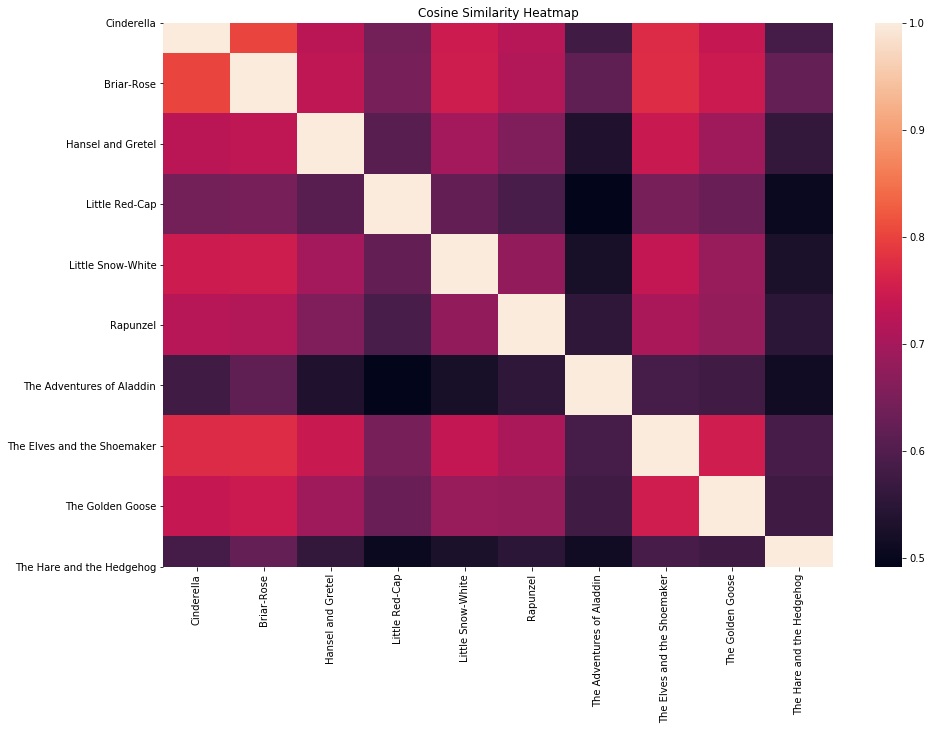

In [6]:
plt.figure(figsize = (15, 10))
sns.heatmap(cosine_similarity_df)
plt.title('Cosine Similarity Heatmap')
plt.show()

In [ ]:
#Relationships to be imported into Neo4J
for row in range(len(cosine_similarity_matrix)):
    for col in range(len(cosine_similarity_matrix[row])):
        if cosine_similarity_matrix[row][col] > 0.6 and stories[row] != stories[col]:
            print(stories[row], ',', stories[col], cosine_similarity_matrix[row][col])